# Gaussian Smoothing

In [83]:
import numpy as np

def gaussian_filter(image, sigma, padding=True):
    ks_half = int(np.ceil(3 * sigma))
    x = np.linspace(-ks_half, ks_half, 2*ks_half + 1, dtype=float)
    kernel = gauss(x, sigma)
    kernel = kernel / np.sum(kernel) # pastikan sum weights dalam kernel = 1
    return kernel

def gauss(x, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * sigma**2))

def gaussian_first_derivative(x, mu, sigma):
    return (-1 / sigma**3) * (x - mu) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def gaussian_first_derivative_filter(image, sigma, padding=True):
    ks_half = int(np.ceil(3 * sigma))
    x = np.linspace(-ks_half, ks_half, 2*ks_half + 1, dtype=float)
    kernel = gaussian_first_derivative(x, 0, sigma)
    kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_second_derivative_filter(image, sigma, padding=True):
    ks_half = int(np.ceil(3 * sigma))
    x = np.linspace(-ks_half, ks_half, 2*ks_half + 1, dtype=float)
    kernel = gaussian_second_derivative(x, 0, sigma)
    kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_second_derivative(x, mu, sigma):
    return (-1 / sigma**2) * ((x - mu) / sigma)**2 * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


In [84]:
image = np.random.rand(10, 10) # contoh gambar 10x10
sigma = 5
filter_gaussian = gaussian_filter(image, sigma)
filter_first_derivative = gaussian_first_derivative_filter(image, sigma)
filter_second_derivative = gaussian_second_derivative_filter(image, sigma)

print("Filter Gaussian: \n", filter)
print("\n\nFilter First Derivative Gaussian: \n", filter_first_derivative)
print("\n\nFilter Second Derivative Gaussian: \n", filter_second_derivative)


Filter Gaussian: 
 [0.00088806 0.00158611 0.00272177 0.00448744 0.00710844 0.01081877
 0.01582012 0.02222644 0.03000255 0.03891121 0.04848635 0.0580487
 0.0667719  0.07379436 0.07835755 0.07994048 0.07835755 0.07379436
 0.0667719  0.0580487  0.04848635 0.03891121 0.03000255 0.02222644
 0.01582012 0.01081877 0.00710844 0.00448744 0.00272177 0.00158611
 0.00088806]


Filter First Derivative Gaussian: 
 [ 1.22954890e+15  2.04962014e+15  3.26593636e+15  4.97041730e+15
  7.21738301e+15  9.98598134e+15  1.31421120e+16  1.64124254e+16
  1.93851498e+16  2.15495863e+16  2.23770317e+16  2.14321367e+16
  1.84896190e+16  1.36227928e+16  7.23258963e+15 -0.00000000e+00
 -7.23258963e+15 -1.36227928e+16 -1.84896190e+16 -2.14321367e+16
 -2.23770317e+16 -2.15495863e+16 -1.93851498e+16 -1.64124254e+16
 -1.31421120e+16 -9.98598134e+15 -7.21738301e+15 -4.97041730e+15
 -3.26593636e+15 -2.04962014e+15 -1.22954890e+15]


Filter Second Derivative Gaussian: 
 [0.00815622 0.01268976 0.01877599 0.02637703 0.03510

In [85]:
from matplotlib import pyplot as plt

image_filtered = np.convolve(image.flatten(), filter_gaussian, mode='same').reshape(image.shape)
image_filtered_first_derivative = np.convolve(image.flatten(), filter_first_derivative, mode='same').reshape(image.shape)
image_filtered_second_derivative = np.convolve(image.flatten(), filter_second_derivative, mode='same').reshape(image.shape)


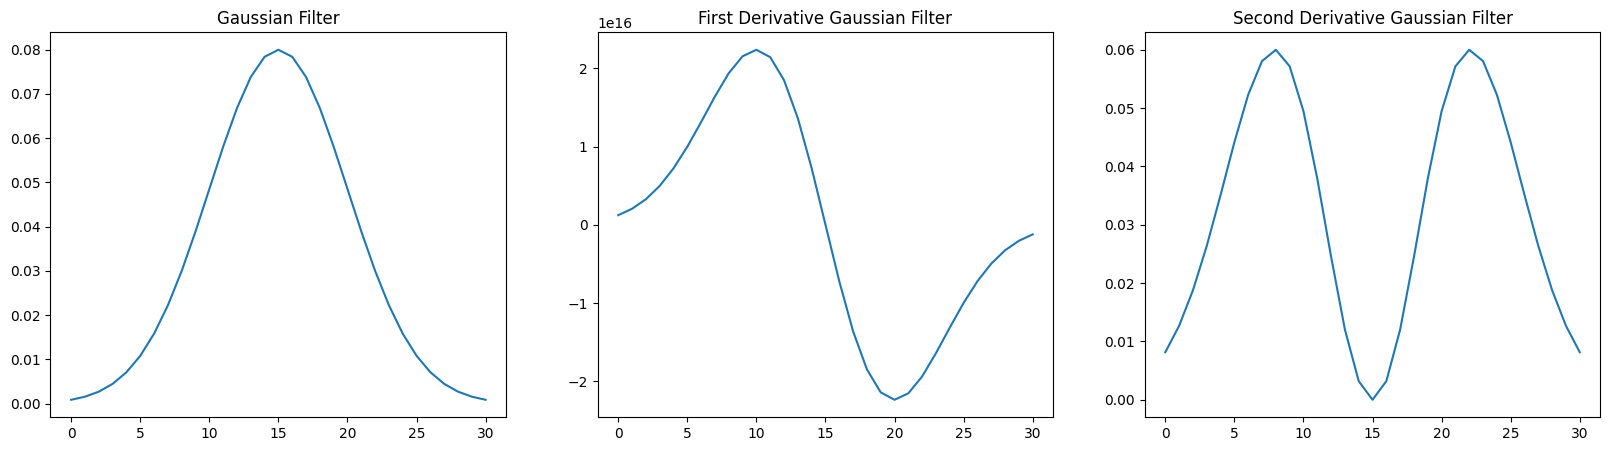

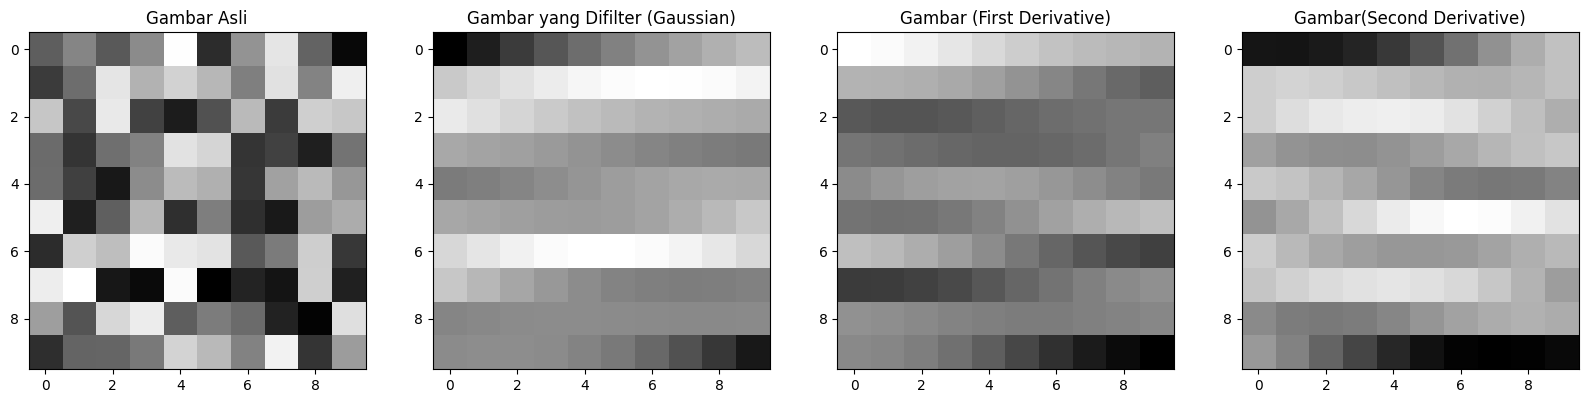

In [86]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(filter_gaussian)
plt.title("Gaussian Filter")
plt.subplot(132)
plt.plot(filter_first_derivative)
plt.title("First Derivative Gaussian Filter")
plt.subplot(133)
plt.plot(filter_second_derivative)
plt.title("Second Derivative Gaussian Filter")

# Menampilkan gambar pada subplot kedua yang telah difilter dan diderivasi
plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(142)
plt.imshow(image_filtered, cmap='gray')
plt.title('Gambar yang Difilter (Gaussian)')

plt.subplot(143)
plt.imshow(image_filtered_first_derivative, cmap='gray')
plt.title('Gambar (First Derivative)')

plt.subplot(144)
plt.imshow(image_filtered_second_derivative, cmap='gray')
plt.title('Gambar(Second Derivative)')

plt.show()

In [87]:
def laplacian_operator(size):
    """
    Membuat kernel untuk Laplacian Operator.
    
    Parameters:
        size (int): Ukuran kernel.
    
    Returns:
        numpy.ndarray: Kernel Laplacian Operator.
    """
    if size % 2 == 0:
        raise ValueError("Ukuran kernel harus ganjil.")
    
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            if i == center and j == center:
                kernel[i, j] = -4
            else:
                kernel[i, j] = 1
    return kernel

def gaussian_laplacian(size, sigma):
    """
    Membuat kernel untuk Laplacian of Gaussian (LoG).
    
    Parameters:
        size (int): Ukuran kernel.
        sigma (float): Standar deviasi untuk Gaussian.
    
    Returns:
        numpy.ndarray: Kernel Laplacian of Gaussian (LoG).
    """
    if size % 2 == 0:
        raise ValueError("Ukuran kernel harus ganjil.")
    
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = (x**2 + y**2 - 2 * sigma**2) / (sigma**4) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel



In [88]:
laplacian_kernel = laplacian_operator(size=3)
log_kernel = gaussian_laplacian(size=3, sigma=2.0)

print("Kernel Laplacian Operator:")
print(laplacian_kernel)

print("\nKernel Laplacian of Gaussian (LoG):")
print(log_kernel)

Kernel Laplacian Operator:
[[ 1.  1.  1.]
 [ 1. -4.  1.]
 [ 1.  1.  1.]]

Kernel Laplacian of Gaussian (LoG):
[[-0.29205029 -0.38609239 -0.29205029]
 [-0.38609239 -0.5        -0.38609239]
 [-0.29205029 -0.38609239 -0.29205029]]


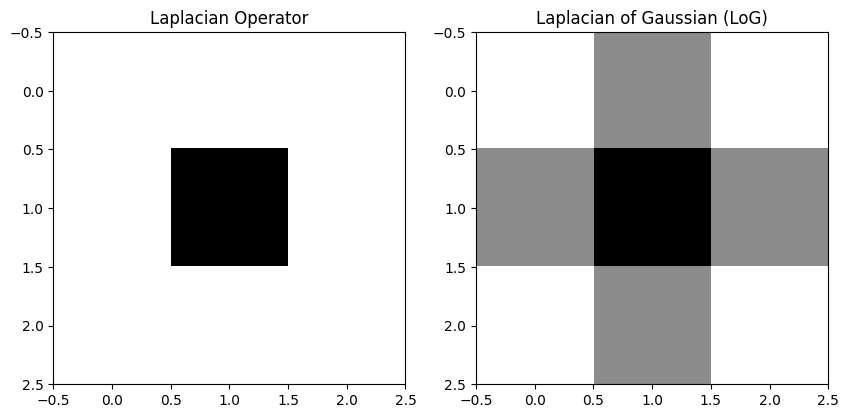

In [89]:
# plot kernel
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(laplacian_kernel, cmap='gray')
plt.title('Laplacian Operator')

plt.subplot(122)
plt.imshow(log_kernel, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.show()

In [90]:
import numpy as np

def gauss(x, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * sigma**2))

def difference_of_gaussian(x, sigma1, sigma2):
    return gauss(x, sigma1) - gauss(x, sigma2)

def difference_of_gaussian_filter(image, sigma1, sigma2):
    size = int(np.ceil(3 * max(sigma1, sigma2)))
    kernel = np.zeros((2 * size + 1, 2 * size + 1))
    for i in range(-size, size + 1):
        for j in range(-size, size + 1):
            kernel[i + size, j + size] = difference_of_gaussian(np.sqrt(i**2 + j**2), sigma1, sigma2)
    kernel = kernel / np.sum(kernel)
    return np.convolve(image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

In [ ]:
import numpy as np
from scipy.signal import convolve2d

def gauss(x, y, sigma):
    return 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

def difference_of_gaussian(image, sigma1, sigma2):
    size = int(np.ceil(3 * max(sigma1, sigma2)))
    kernel1 = np.zeros((2 * size + 1, 2 * size + 1))
    kernel2 = np.zeros((2 * size + 1, 2 * size + 1))
    for i in range(-size, size + 1):
        for j in range(-size, size + 1):
            kernel1[i + size, j + size] = gauss(i, j, sigma1)
            kernel2[i + size, j + size] = gauss(i, j, sigma2)
    return kernel1 - kernel2

def difference_of_gaussian_filter(image, sigma1, sigma2):
    dog_kernel = difference_of_gaussian(image, sigma1, sigma2)
    return convolve2d(image, dog_kernel, mode='same')


In [ ]:
sigma1 = 1
sigma2 = 2
dog_filter = difference_of_gaussian_filter(image, sigma1, sigma2)

print("Gambar setelah difilter dengan Difference of Gaussian:")
print(dog_filter)

Gambar setelah difilter dengan Difference of Gaussian:
[[-0.02012031  0.01917098  0.01506143  0.02927138  0.0366269  -0.00414613
   0.04710263  0.16193655  0.181249    0.06817589]
 [ 0.03371996  0.13666933  0.12806848  0.10544399  0.08030902  0.01552332
   0.04708784  0.14644955  0.19330145  0.11770922]
 [ 0.0600385   0.18215578  0.15417131  0.1183351   0.10360965  0.04519917
   0.02165294  0.0410727   0.09402455  0.10330222]
 [ 0.03977732  0.13669567  0.10765707  0.06540476  0.05348871  0.03601052
   0.00803684 -0.00497052  0.0435772   0.07942622]
 [ 0.03076892  0.12311923  0.13508068  0.06192399 -0.02802539 -0.04316219
  -0.04611669 -0.02046297  0.0484056   0.06570199]
 [ 0.05677437  0.1590148   0.18773158  0.0851105  -0.04906681 -0.04517839
  -0.01239238  0.02711564  0.07621472  0.05551567]
 [ 0.0220945   0.08843425  0.10250312  0.02221688 -0.04458268  0.02661931
   0.07302802  0.0688019   0.1054976   0.09104384]
 [-0.00289919  0.02933944  0.02860511 -0.01403273  0.01395531  0.12066

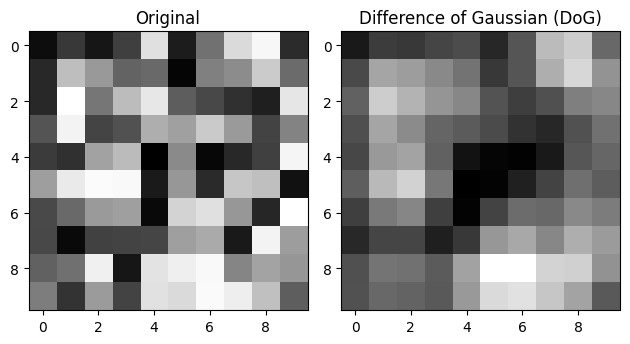

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(difference_of_gaussian_filter(image, sigma1, sigma2), cmap='gray')
plt.title('Difference of Gaussian (DoG)')

plt.tight_layout()
plt.show()
